## Creación de estado cuánticos entrelazados utilizando Yao.jl
Fís. Luis Felipe Flores

In [1]:
using Pkg; Pkg.activate(".");
using Yao, YaoPlots

 Activating environment at `~/computer_science/git_repositories/tutoriales/estados_entrelazados/Project.toml`


Crear estados entrelazados en Yao es fácil:

In [2]:
product_state(2, 00) |> 
    put(2, 1 => H) |> 
    control(2, 1, 2 => X) |> 
    measure

1-element Array{BitBasis.BitStr{2,Int64},1}:
 00 ₍₂₎

Podemos visualizar el vector del estado:

In [3]:
product_state(2, 00) |> 
    put(2, 1 => H) |> 
    control(2, 1, 2 => X) |> 
    state

4×1 Array{Complex{Float64},2}:
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im

Este corresponde, si insistimos en la notación tradicional de Dirac, a

$$
|\psi\rangle = \frac{1}{\sqrt{2}}\left( |00\rangle + |11\rangle \right)
$$

aunque es más fácilmente visualizable mediante álgebra lineal y la representación de matrices de las compuertas

In [4]:
circuit = chain(put(2, 1 => H), control(2, 1, 2 => X))
mat(circuit)

4×4 LinearAlgebra.Adjoint{Complex{Float64},SparseArrays.SparseMatrixCSC{Complex{Float64},Int64}}:
 0.707107+0.0im   0.707107+0.0im       0.0-0.0im        0.0-0.0im
      0.0-0.0im        0.0-0.0im  0.707107+0.0im  -0.707107+0.0im
      0.0-0.0im        0.0-0.0im  0.707107+0.0im   0.707107+0.0im
 0.707107+0.0im  -0.707107+0.0im       0.0-0.0im        0.0-0.0im

In [5]:
state(product_state(2, 00))

4×1 Array{Complex{Float64},2}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

Esto además provee una natural geometrización de los conceptos en términos de la geometría de nuestro espacio vectorial complejo y las operaciones unitarias que hagamos sobre él, sin necesidad de forzar conceptos como el de la esfera de Bloch, cuya geometría de todas maneras surje en términos de álgebra lineal.

Exploremos la construcción anterior paso a paso. Comenzamos creando un registro:

In [6]:
product_state(2, 00) 

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 2/2

In [7]:
product_state(2, 01) |> state

4×1 Array{Complex{Float64},2}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

Como vimos antes, el circuito a aplicar puede ser definito por aparte, y podemos ahora visualizarlo:

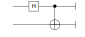

In [8]:
circuit |> plot

Tras aplicar el circuito, el estado cambia:

In [9]:
product_state(2, 00) |> circuit |> state

4×1 Array{Complex{Float64},2}:
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im

Podemos ver la evolución del estado paso a paso, primero aplicando la transformada de Hadamard:

In [10]:
product_state(2, 00) |> put(2, 1 => H) |> state

4×1 Array{Complex{Float64},2}:
 0.7071067811865475 + 0.0im
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im

Y luego la compuerta NOT controlada:

In [11]:
product_state(2, 00) |> put(2, 1 => H) |> control(2, 1, 2 => X) |> state

4×1 Array{Complex{Float64},2}:
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im

Podemos medir el estado resultante para obtener una respuesta clásica, la cual va a cambiar cada vez que se mide, acorde a su distribución discreta de probabilidad:

In [12]:
product_state(2, 00) |> put(2, 1 => H) |> control(2, 1, 2 => X) |> measure

1-element Array{BitBasis.BitStr{2,Int64},1}:
 00 ₍₂₎

Esto es más evidente si medimos varias veces en un ensamble de experimentos idénticos:

In [13]:
product_state(2, 00) |> 
    put(2, 1 => H) |> 
    control(2, 1, 2 => X) |> 
    r -> measure(r; nshots=10)

10-element Array{BitBasis.BitStr{2,Int64},1}:
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎

Podemos visualizar su distribución de probabilidad utilizando algunos paquetes auxiliares de estadística y de gráficos:

In [14]:
using StatsBase: Histogram, fit
using Plots: bar, scatter!, gr; gr()
using BitBasis

Definimos nuestra función para graficar:

In [15]:
function plotmeasure(x::Array{BitStr{n,Int},1}) where n
    hist = fit(Histogram, Int.(x), 0:2^n)
    x = 0
    bar(hist.edges[1] .- 0.5, hist.weights, legend=:none, ylims=(collect(0:maximum(hist.weights))), xlims=(collect(0:2^n)), grid=:false, ticks=false, border=:none, color=:lightblue, lc=:lightblue)
    scatter!(0:2^n-1, ones(2^n,1), markersize=0,
     series_annotations="|" .* string.(hist.edges[1]; base=2, pad=n) .* "⟩")
    scatter!(0:2^n-1, zeros(2^n,1) .+ maximum(hist.weights), markersize=0,
     series_annotations=string.(hist.weights))
end

plotmeasure (generic function with 1 method)

Y graficamos:

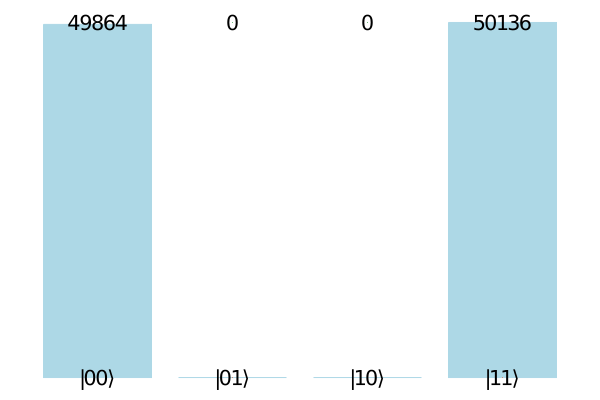

In [16]:
product_state(2, 00) |> 
    put(2, 1 => H) |> 
    control(2, 1, 2 => X) |> 
    (x -> measure(x; nshots=100000)) |>
    plotmeasure